In [1]:
import jax
import jax.numpy as jnp
import liesel.goose as gs
import plotnine as p9
import tensorflow_probability.substrates.jax.bijectors as tfb

import liesel_ptm as ptm

In [2]:
from pathlib import Path

import dill as pickle

with open(Path.cwd() / ".." / "notebooks" / "y_ridge.pkl", "rb") as fp:
    y = pickle.load(fp)

In [3]:
# y = jnp.r_[y, y, y, y, y,y,y,y,y,y]
# y.shape

In [4]:
# y = jnp.r_[y,y]
# y.shape

In [5]:
nparam = 10
knots = ptm.OnionKnots(a=-4.0, b=4.0, nparam=nparam)

In [6]:
model = ptm.LocScalePTM(y, knots.knots, bspline="onion")
kernel_kwargs = {"da_target_accept": 0.9}
model.trafo += ptm.PTMCoef.new_rw1_fromzero(
    knots=knots.knots,
    scale=ptm.ScaleWeibull(
        0.2,
        scale=0.5,
        name="trafo0_scale",
        inference=gs.MCMCSpec(
            gs.NUTSKernel, kernel_group="1", kernel_kwargs=kernel_kwargs
        ),
        bijector=tfb.Exp(),
    ),
    name="trafo0",
    inference=gs.MCMCSpec(gs.NUTSKernel, kernel_group="1", kernel_kwargs=kernel_kwargs),
    diagonalize_penalty=True,
)
model.build()

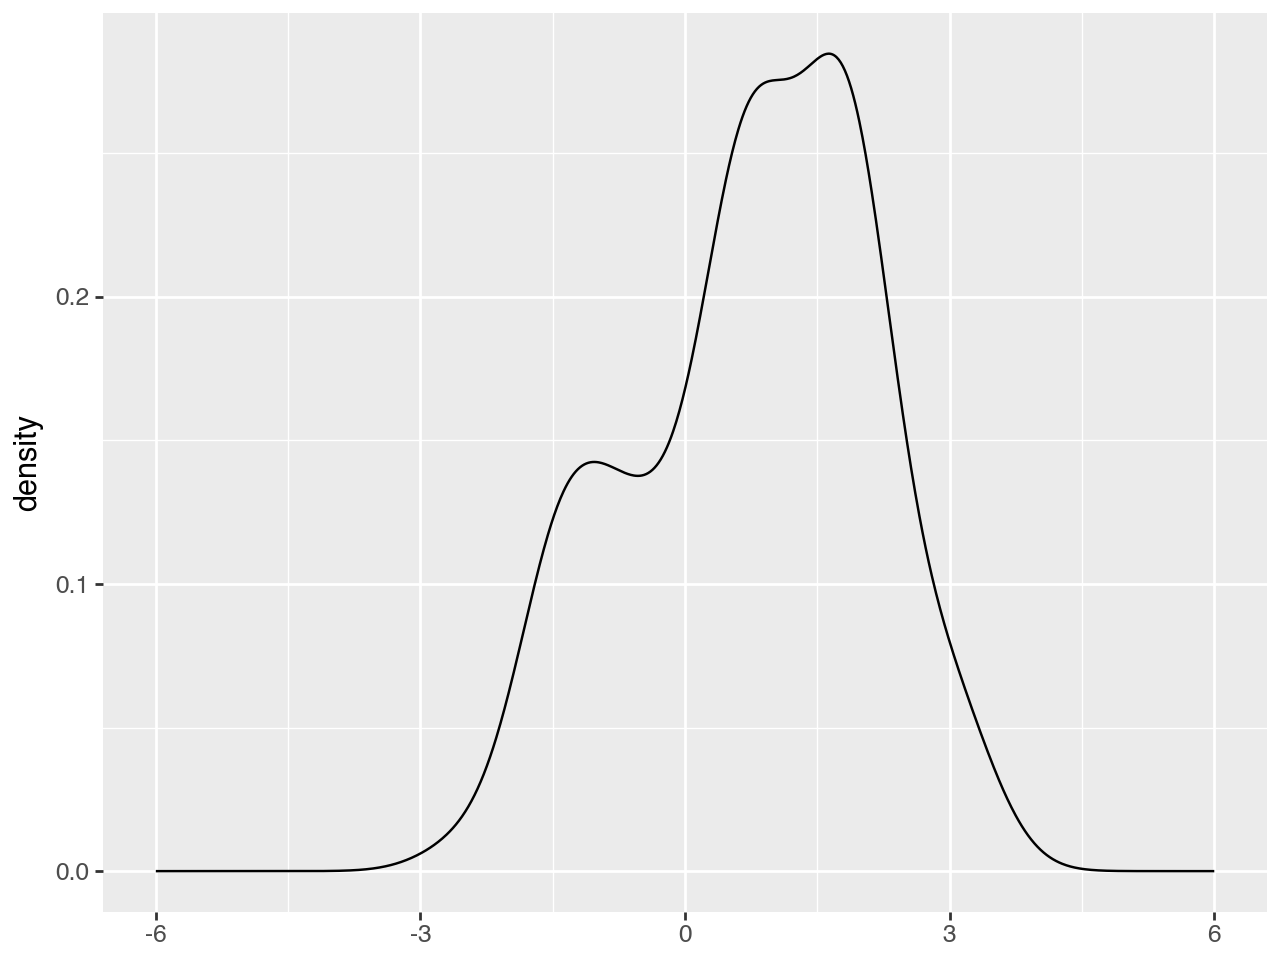

In [7]:
r_sample = model.response.value
(p9.ggplot() + p9.geom_density(p9.aes(r_sample)) + p9.xlim((-6.0, 6.0)))

In [8]:
results = model.run_mcmc(seed=2, warmup=1000, posterior=1000)

liesel.goose.builder - WARNING - No jitter functions provided for position keys 'trafo0_latent', 'trafo0_scale_square_transformed', 'scale_intercept', 'loc_intercept'. The initial values for these keys won't be jittered
liesel.goose.engine - INFO - Initializing kernels...
liesel.goose.engine - INFO - Done
liesel.goose.engine - INFO - Starting epoch: FAST_ADAPTATION, 250 transitions, 25 jitted together
100%|████████████████████████████████████████| 10/10 [00:03<00:00,  2.76chunk/s]
liesel.goose.engine - WARNING - Errors per chain for kernel_00: 0, 0, 1, 1 / 250 transitions
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 25 transitions, 25 jitted together
100%|████████████████████████████████████████| 1/1 [00:00<00:00, 1001.27chunk/s]
liesel.goose.engine - WARNING - Errors per chain for kernel_00: 1, 1, 1, 1 / 25 transitions
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 5

In [9]:
gs.Summary(results)

/Users/johannesbrachem/Documents/git/liesel_ptm2/.venv/lib/python3.13/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide


Parameter summary:

                                          kernel      mean            sd  \
parameter                       index                                      
loc_intercept                   ()     kernel_02  0.764880  5.960464e-08   
scale_intercept                 ()     kernel_01  0.285308  8.940697e-08   
trafo0_latent                   (0,)   kernel_00  0.092466  2.281408e-01   
                                (1,)   kernel_00 -0.028582  1.858406e-01   
                                (2,)   kernel_00  0.007133  1.897887e-01   
                                (3,)   kernel_00 -0.041780  1.842743e-01   
                                (4,)   kernel_00  0.102557  1.855337e-01   
                                (5,)   kernel_00 -0.033229  1.483382e-01   
                                (6,)   kernel_00 -0.157855  1.840190e-01   
                                (7,)   kernel_00 -0.030369  1.192096e-01   
                                (8,)   kernel_00 -0.004731  1.115035e-01   
                                (9,)   kernel_00  0.004764  1.054628e-01   
trafo0_scale_square_transformed ()     kernel_00 -4.731315  2.032674e+00   

                                         q_0.05     q_0.5    q_0.95  \
parameter                       index                                 
loc_intercept                   ()     0.764880  0.764880  0.764880   
scale_intercept                 ()     0.285308  0.285308  0.285308   
trafo0_latent                   (0,)  -0.131010  0.024620  0.520831   
                                (1,)  -0.347916 -0.006522  0.224145   
                                (2,)  -0.274259  0.000618  0.305560   
                                (3,)  -0.377355 -0.009380  0.177287   
                                (4,)  -0.087311  0.043138  0.482460   
                                (5,)  -0.313685 -0.007350  0.157051   
                                (6,)  -0.509040 -0.099360  0.022139   
                                (7,)  -0.238845 -0.013133  0.124335   
                                (8,)  -0.158163 -0.009795  0.182817   
                                (9,)  -0.152201  0.003896  0.154894   
trafo0_scale_square_transformed ()    -8.185150 -4.533159 -1.713582   

                                       sample_size     ess_bulk     ess_tail  \
parameter                       index                                          
loc_intercept                   ()            4000  4000.000000  4000.000000   
scale_intercept                 ()            4000  4000.000000  4000.000000   
trafo0_latent                   (0,)          4000   876.588958   942.464838   
                                (1,)          4000  2939.910951   980.134506   
                                (2,)          4000  3644.702415  1021.184385   
                                (3,)          4000  2024.943736   868.540915   
                                (4,)          4000   421.578362  1142.754291   
                                (5,)          4000  1325.859772   819.639593   
                                (6,)          4000   113.806609   928.459394   
                                (7,)          4000  1395.801225  1003.426012   
                                (8,)          4000  1812.512603   884.878119   
                                (9,)          4000  1637.064716  1016.177205   
trafo0_scale_square_transformed ()            4000    52.318112   110.230943   

                                           rhat  
parameter                       index            
loc_intercept                   ()          NaN  
scale_intercept                 ()          NaN  
trafo0_latent                   (0,)   1.024785  
                                (1,)   1.044583  
                                (2,)   1.042152  
                                (3,)   1.034987  
                                (4,)   1.026941  
                                (5,)   1.032593  
                                (6,)   1.039847  
                      

In [10]:
samples = results.get_posterior_samples()

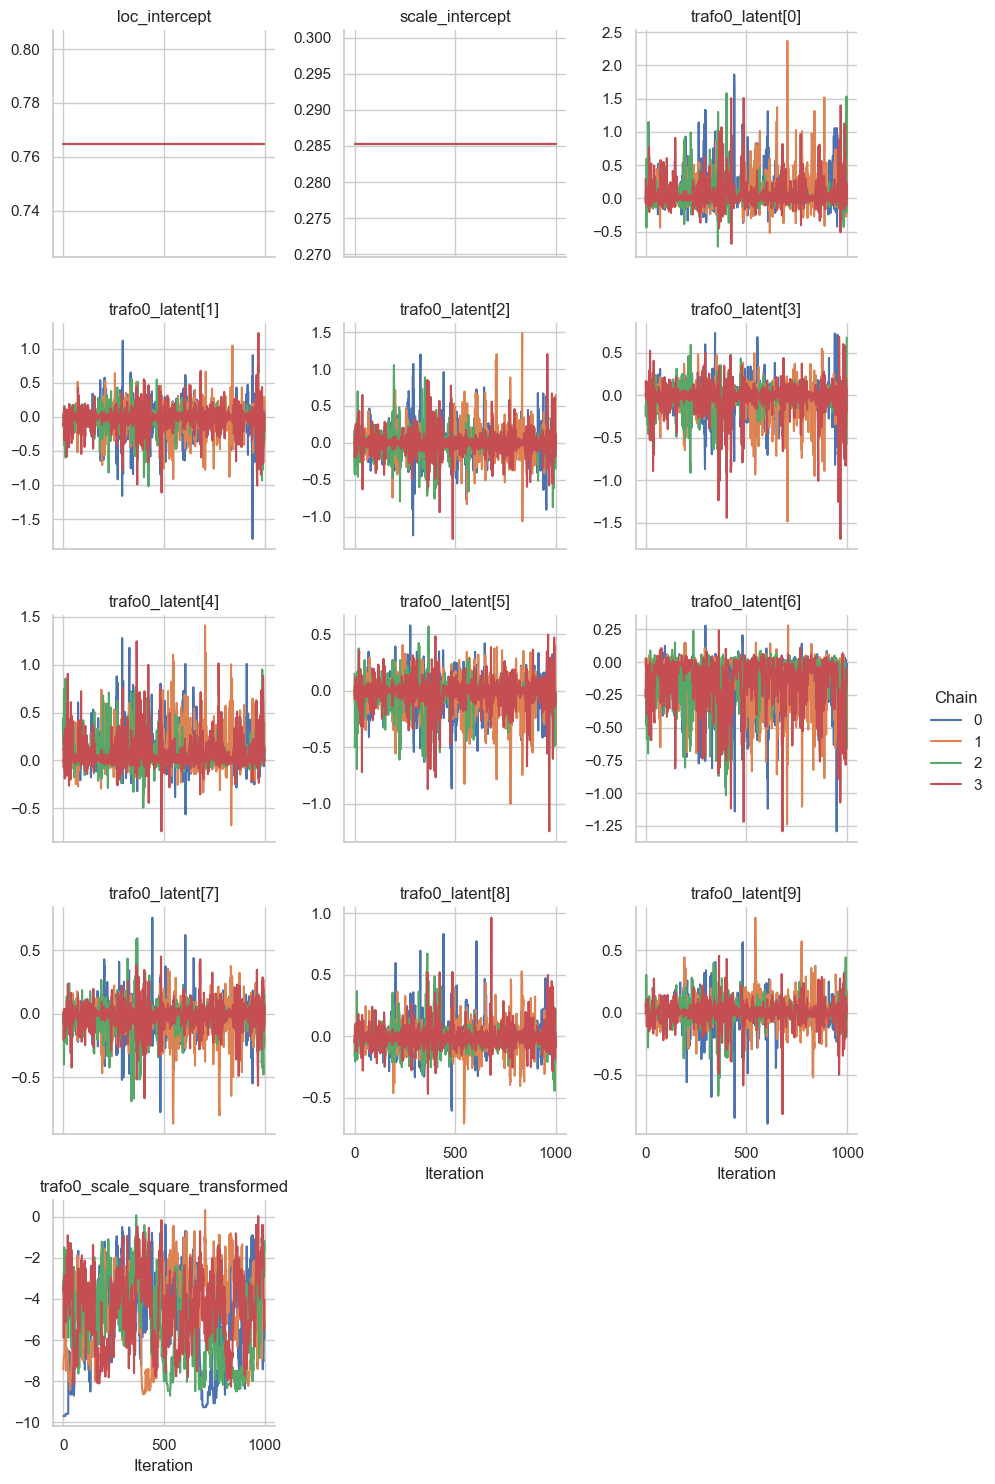

In [11]:
gs.plot_trace(jax.tree.map(jnp.squeeze, samples))

In [12]:
dist = model.init_dist(samples, loc=0.0, scale=1.0)
rgrid = jnp.linspace(-6.0, 6.0, 301)
probs = jnp.exp(dist.log_prob(rgrid))
z = dist.transformation_and_logdet(rgrid)[0]

/Users/johannesbrachem/Documents/git/liesel_ptm2/.venv/lib/python3.13/site-packages/arviz/stats/diagnostics.py:845: RuntimeWarning: invalid value encountered in scalar divide
/Users/johannesbrachem/Documents/git/liesel_ptm2/.venv/lib/python3.13/site-packages/arviz/stats/diagnostics.py:845: RuntimeWarning: invalid value encountered in scalar divide
/Users/johannesbrachem/Documents/git/liesel_ptm2/.venv/lib/python3.13/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide


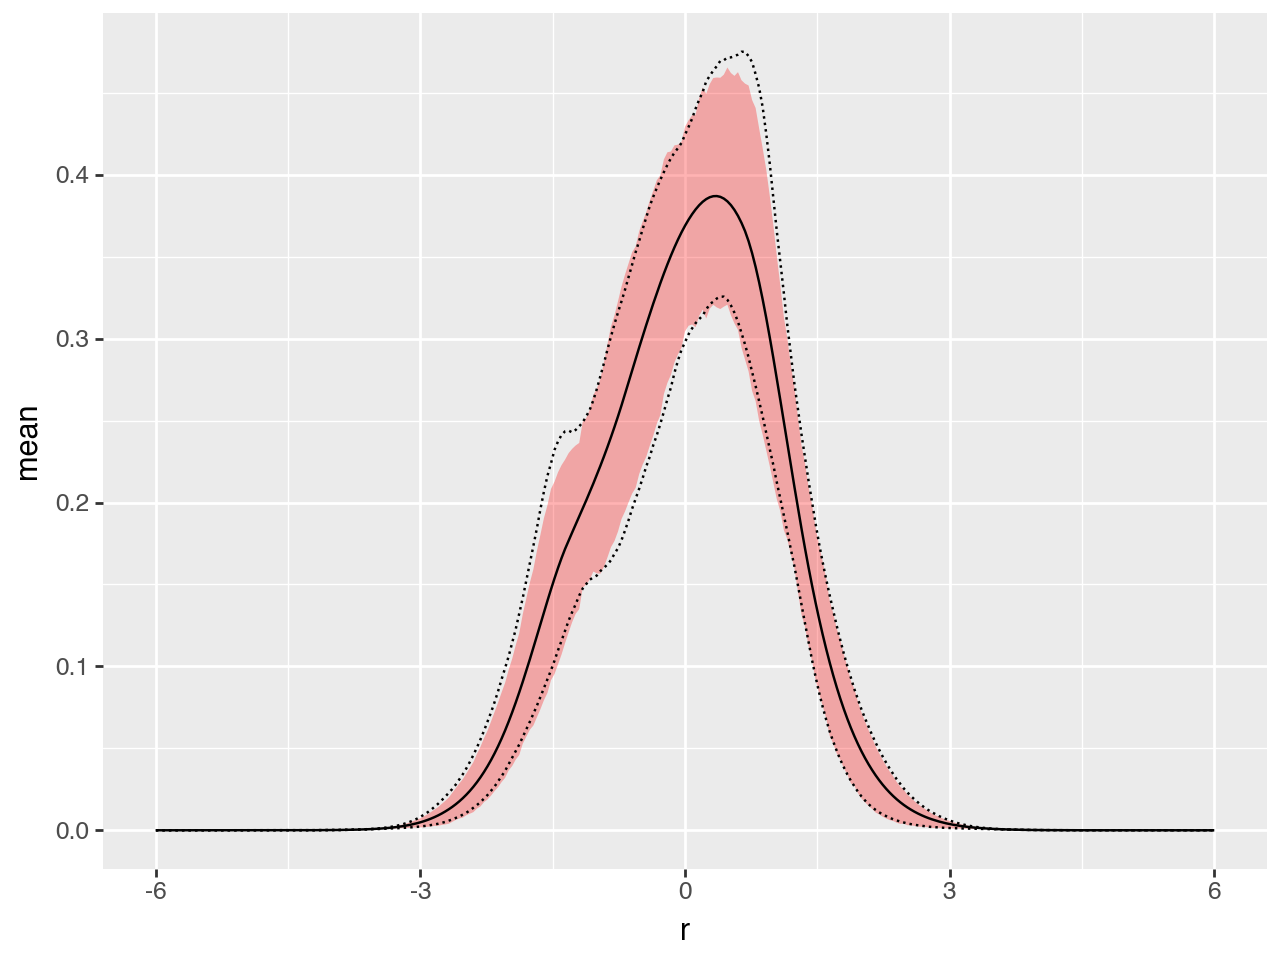

In [13]:
pdf_summary = gs.SamplesSummary({"pdf": probs}).to_dataframe().reset_index()
pdf_summary["r"] = rgrid

(
    p9.ggplot(pdf_summary)
    + p9.aes("r", "mean")
    + p9.geom_ribbon(
        p9.aes("r", ymin="hdi_low", ymax="hdi_high"), fill="red", alpha=0.3
    )
    + p9.geom_line()
    + p9.geom_line(p9.aes("r", y="q_0.05"), linetype="dotted")
    + p9.geom_line(p9.aes("r", y="q_0.95"), linetype="dotted")
)

/Users/johannesbrachem/Documents/git/liesel_ptm2/.venv/lib/python3.13/site-packages/arviz/stats/diagnostics.py:845: RuntimeWarning: invalid value encountered in scalar divide
/Users/johannesbrachem/Documents/git/liesel_ptm2/.venv/lib/python3.13/site-packages/arviz/stats/diagnostics.py:845: RuntimeWarning: invalid value encountered in scalar divide
/Users/johannesbrachem/Documents/git/liesel_ptm2/.venv/lib/python3.13/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide


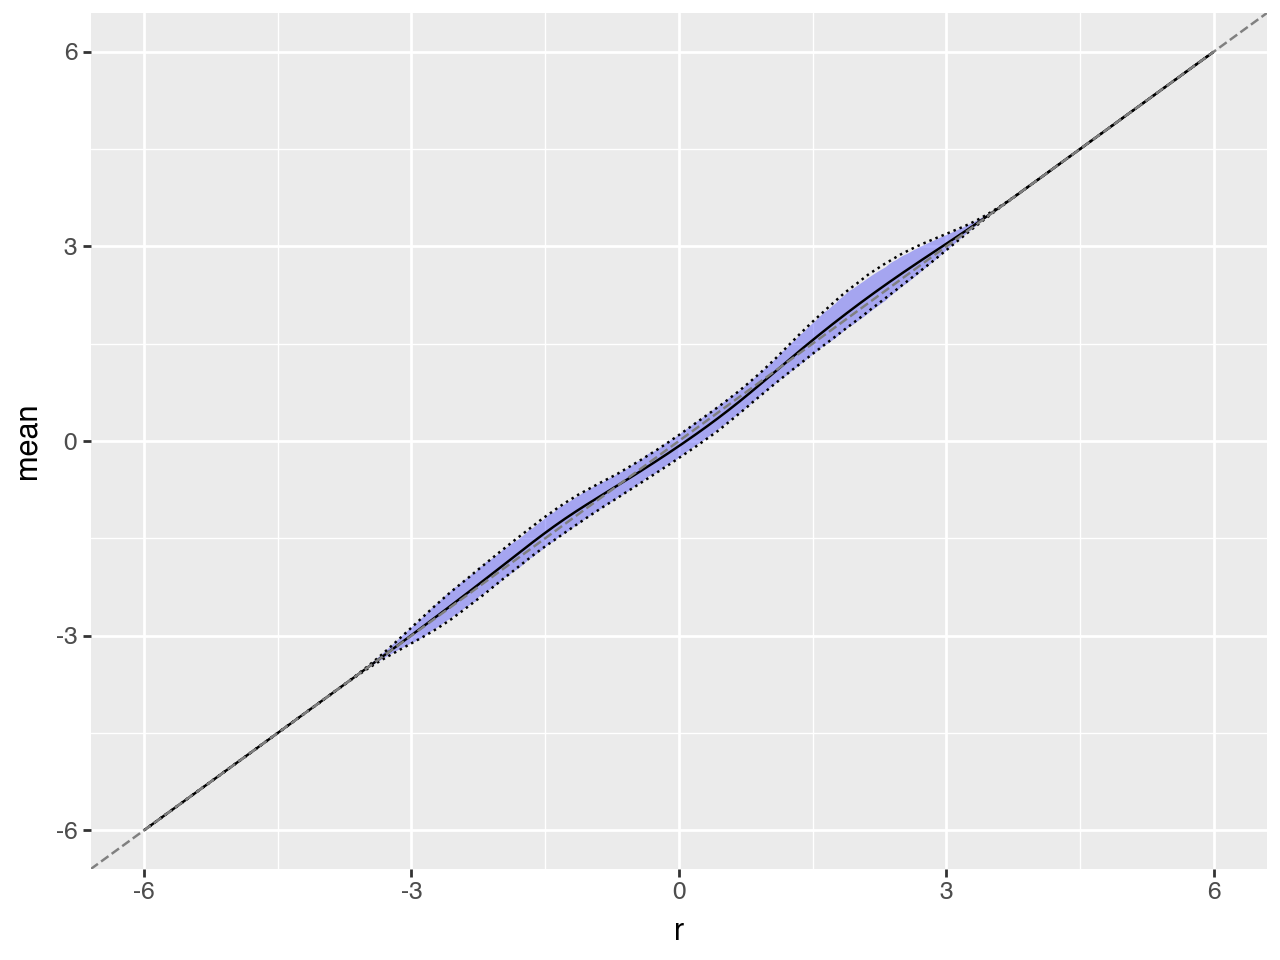

In [14]:
z_summary = gs.SamplesSummary({"z": z}).to_dataframe().reset_index()
z_summary["r"] = rgrid

(
    p9.ggplot(z_summary)
    + p9.aes("r", "mean")
    + p9.geom_ribbon(
        p9.aes("r", ymin="hdi_low", ymax="hdi_high"), fill="blue", alpha=0.3
    )
    + p9.geom_line()
    + p9.geom_line(p9.aes("r", y="q_0.05"), linetype="dotted")
    + p9.geom_line(p9.aes("r", y="q_0.95"), linetype="dotted")
    + p9.geom_abline(intercept=0.0, slope=1.0, linetype="dashed", color="grey")
)

In [15]:
pdf_samples = model.summarise_trafo_by_samples(
    jax.random.key(101), grid=rgrid, samples=samples
)
pdf_samples.head()

,z,cdf,pdf,index,obs,chain,sample,r
0,-6.00,9.865896e-10,6.075888e-09,0,0,3,0,-6.00
1,-5.96,1.261190e-09,7.717795e-09,1,1,3,0,-5.96
2,-5.92,1.609706e-09,9.787707e-09,2,2,3,0,-5.92
3,-5.88,2.051334e-09,1.239294e-08,3,3,3,0,-5.88
4,-5.84,2.610038e-09,1.566654e-08,4,4,3,0,-5.84


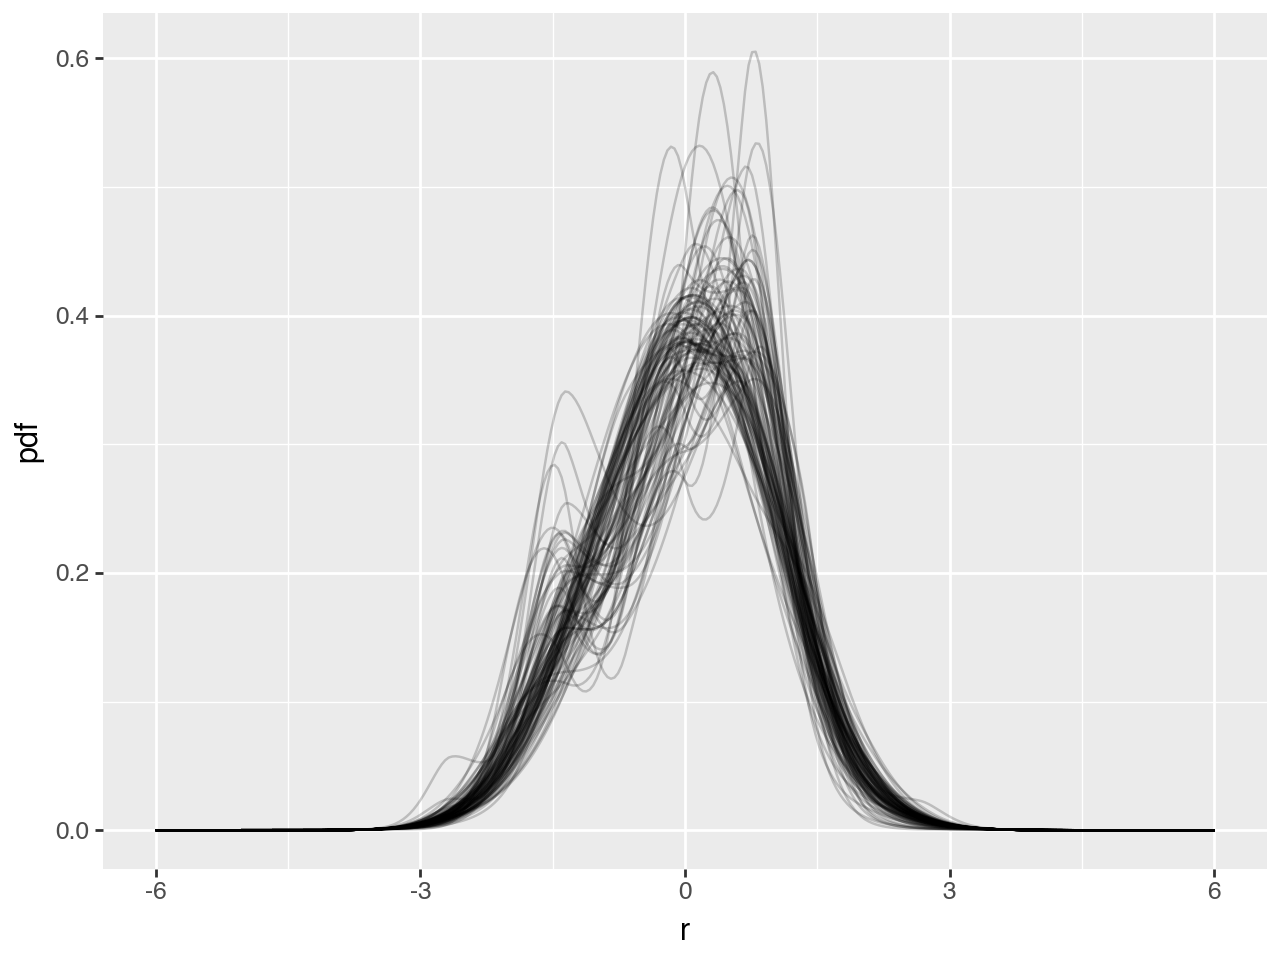

In [16]:
(
    p9.ggplot(pdf_samples)
    + p9.aes("r", "pdf")
    + p9.geom_line(p9.aes(group="sample"), alpha=0.2)
)

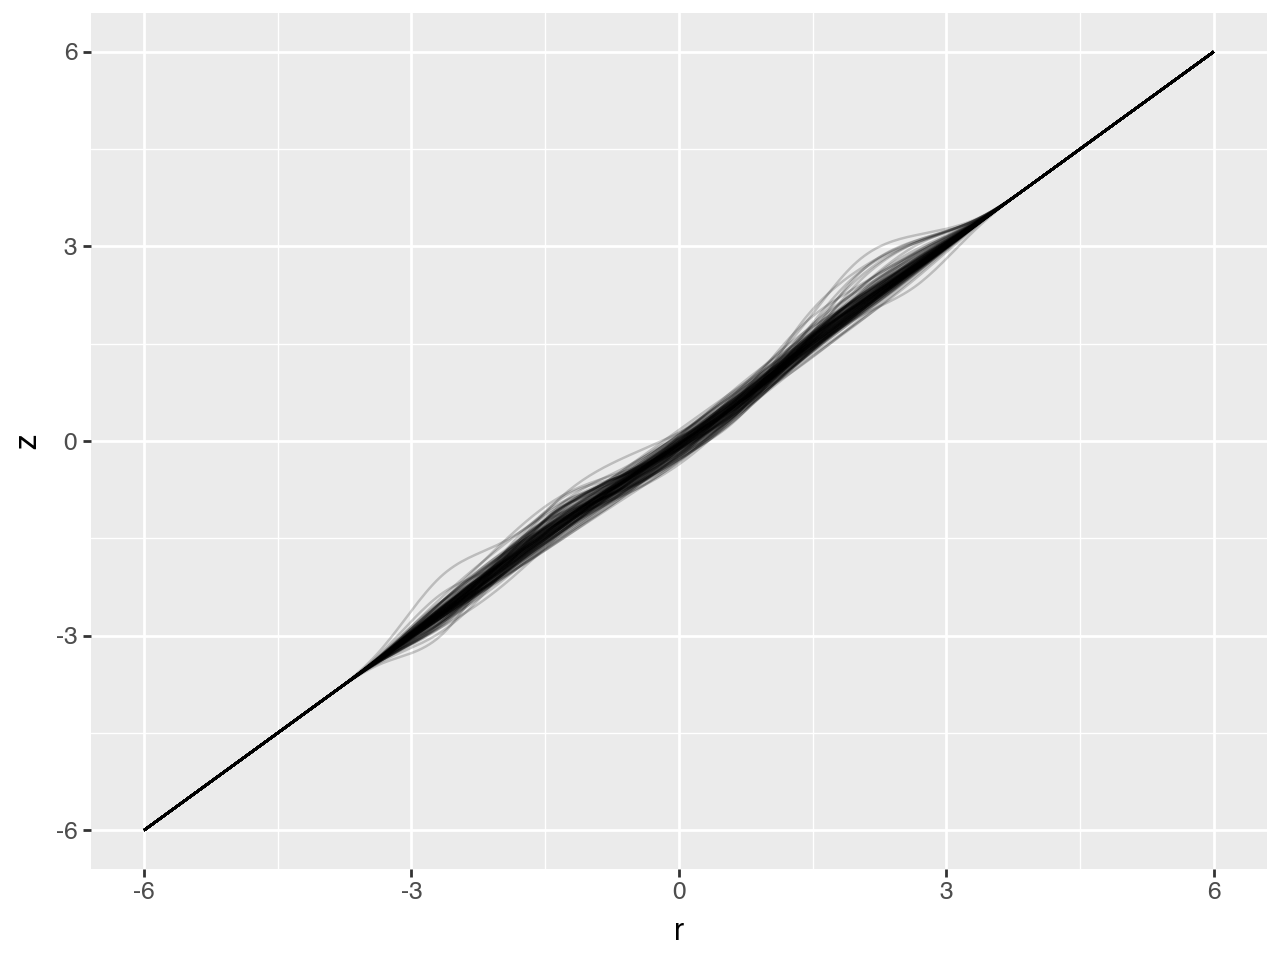

In [17]:
(
    p9.ggplot(pdf_samples)
    + p9.aes("r", "z")
    + p9.geom_line(p9.aes(group="sample"), alpha=0.2)
)

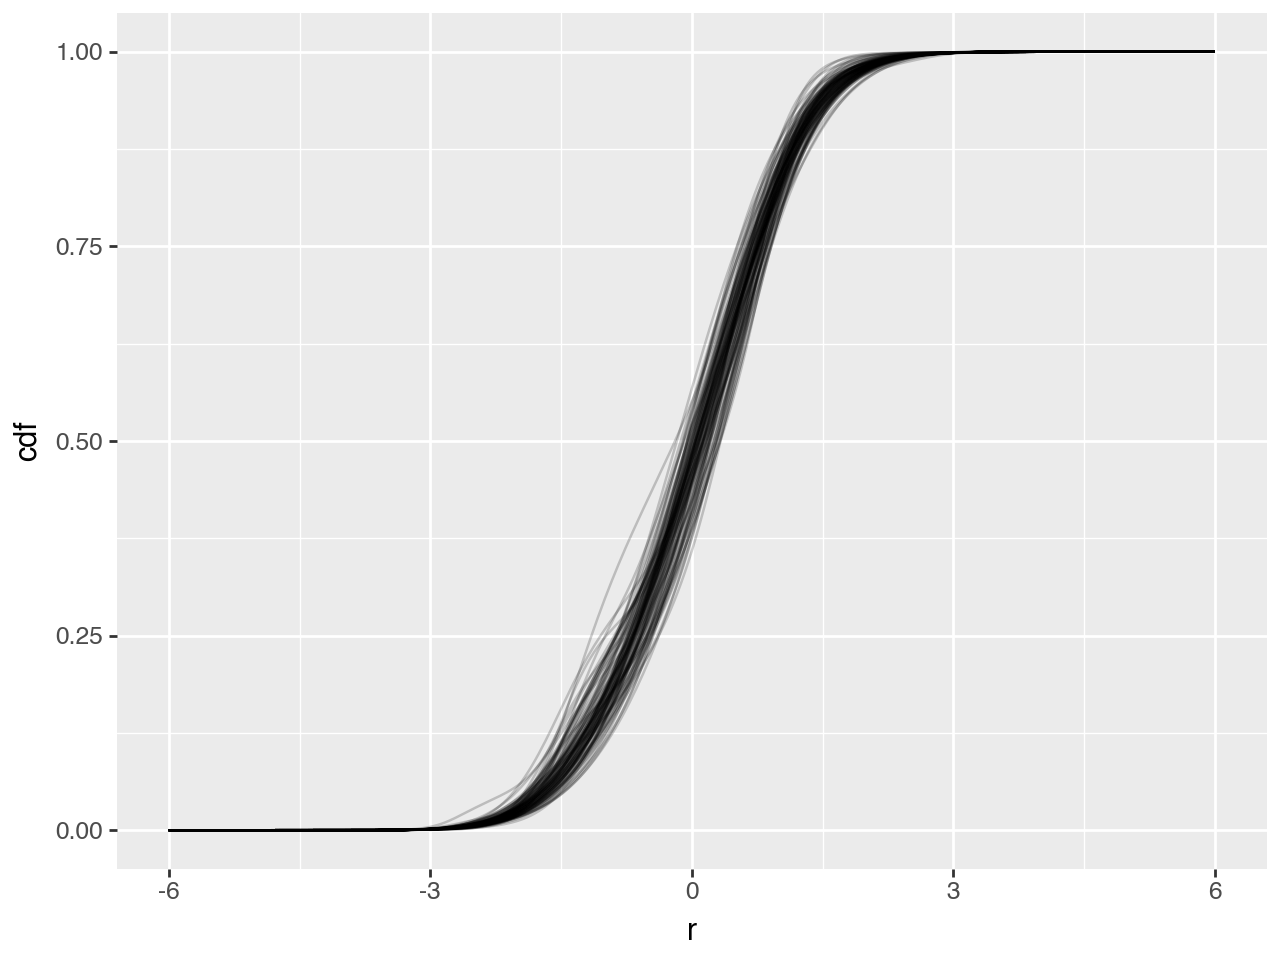

In [18]:
(
    p9.ggplot(pdf_samples)
    + p9.aes("r", "cdf")
    + p9.geom_line(p9.aes(group="sample"), alpha=0.2)
)